In [83]:
import matplotlib.pyplot as plt
import matplotlib
import numpy
import pandas as pd
import psycopg2
import statsmodels.api as sm

In [7]:
connection_config = {
    'host': 'localhost',
    'port': '5432',
    'database': 'bitcoin',
    'user': 'takumi'
}
connection = psycopg2.connect(**connection_config)
plt.style.use('ggplot')
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)

In [72]:
data = pd.read_sql(sql="""
SELECT
    date
  , ntran
  , ntrat
  , ntrep
  , etrav
  , toutv
  --, exch
  --, exbt
  , totbc
  , mkpru
  , trfee
  , mirev
  , diff
  , atrct
  , naddu
  , avbls
  , bcdde
  , bcddc
  , hrate
FROM bitcoin;
""", con=connection, index_col='date', parse_dates=True)

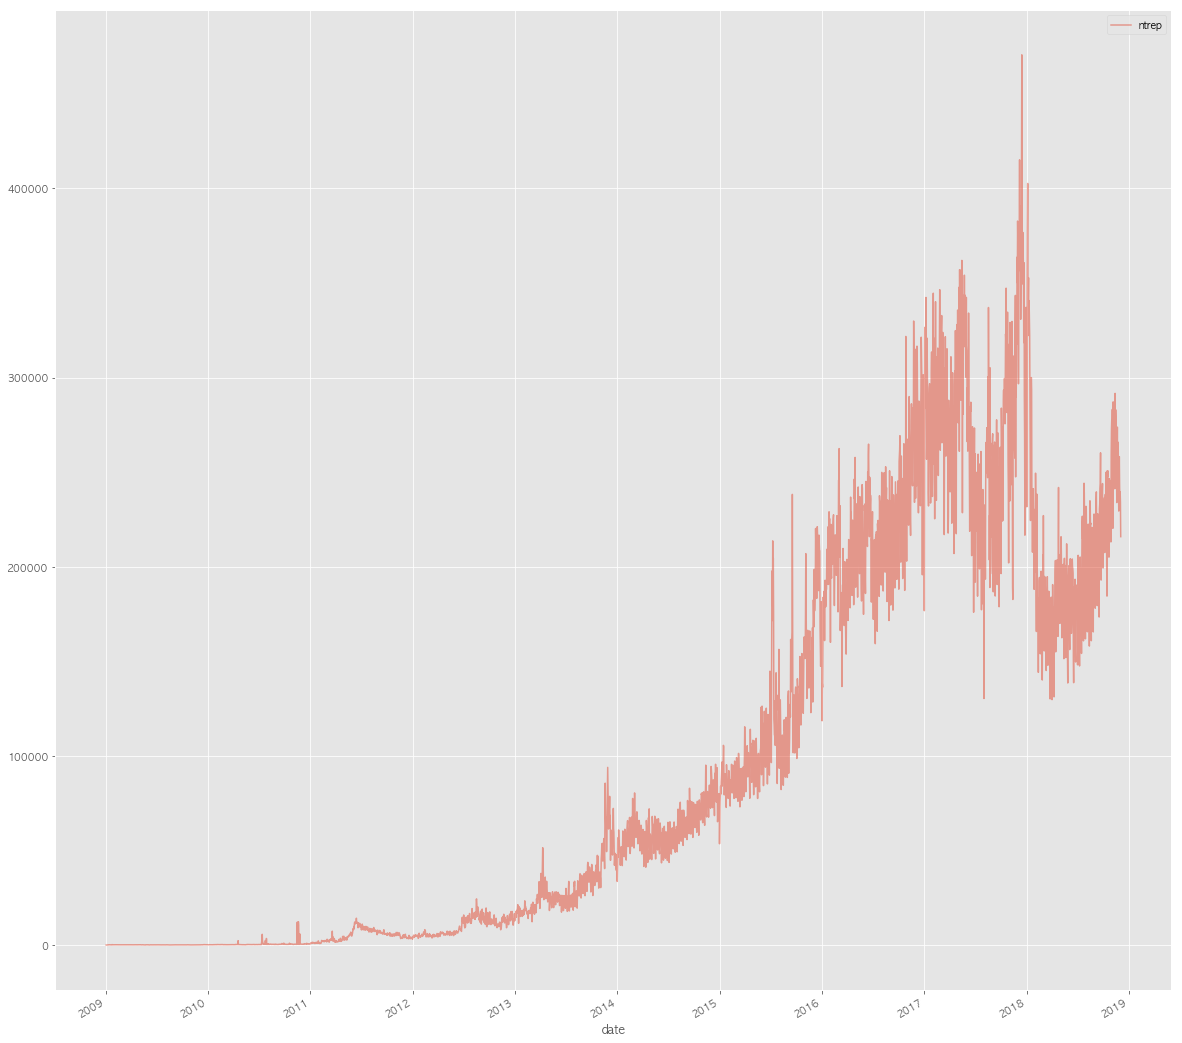

In [51]:
data.plot(y='ntrep', figsize=(20,20), alpha=0.5)

In [57]:
data_l = pd.read_sql(sql="""
SELECT
    date
  , lntran
  , lntrat
  , lntrep
  , letrav
  , ltoutv
  --, lexch
  --, lexbt
  , ltotbc
  , lmkpru
  , ltrfee
  , lmirev
  , ldiff
  , latrct
  , lnaddu
  , lavbls
  , lbcdde
  , lbcddc
  , lhrate
FROM bitcoin_log
WHERE phase='3';
""", con=connection, index_col='date', parse_dates=True)

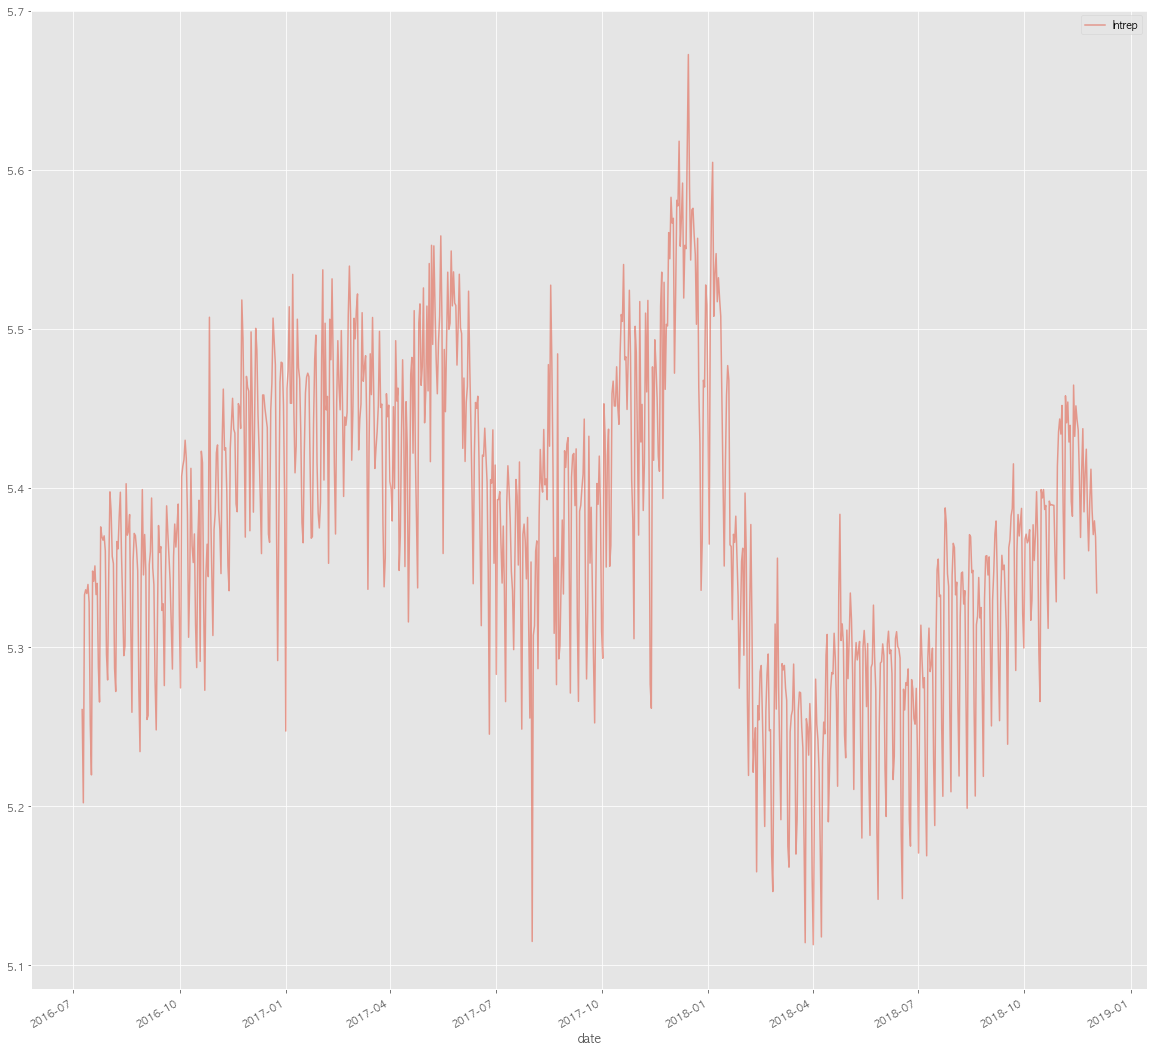

In [58]:
data_l.plot(y='lntrep', figsize=(20,20), alpha=0.5)

In [62]:
data_d = pd.read_sql(sql="""
SELECT
    date
  , dntran
  , dntrat
  , dntrep
  , detrav
  , dtoutv
  --, dexch
  --, dexbt
  , dtotbc
  , dmkpru
  , dtrfee
  , dmirev
  , ddiff
  , datrct
  , dnaddu
  , davbls
  , dbcdde
  , dbcddc
  , dhrate
FROM bitcoin_diff
WHERE phase='2';
""", con=connection, index_col='date', parse_dates=True)

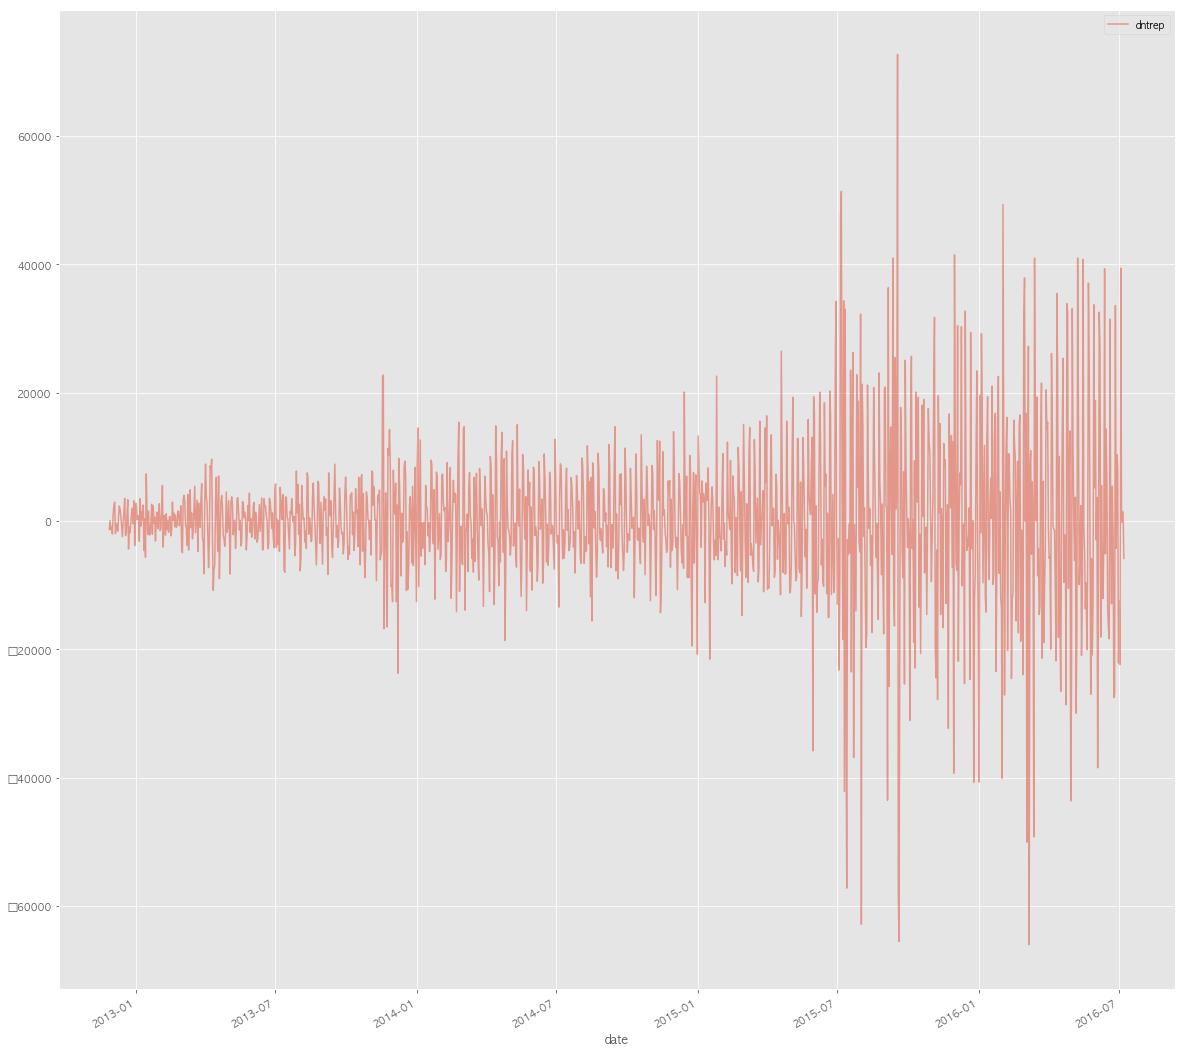

In [63]:
data_d.plot(y='dntrep', figsize=(20,20), alpha=0.5)

In [273]:
data_dl = pd.read_sql(sql="""
SELECT
    date
  , dlntran
  , dlntrat
  , dlntrep
  , dletrav
  , dltoutv
  --, dlexch
  --, dlexbt
  , dltotbc
  , dlmkpru
  , dltrfee
  , dlmirev
  , dldiff
  , dlatrct
  , dlnaddu
  , dlavbls
  , dlbcdde
  , dlbcddc
  , dlhrate
FROM bitcoin_log_diff
WHERE phase='2';
""", con=connection, index_col='date', parse_dates=True)

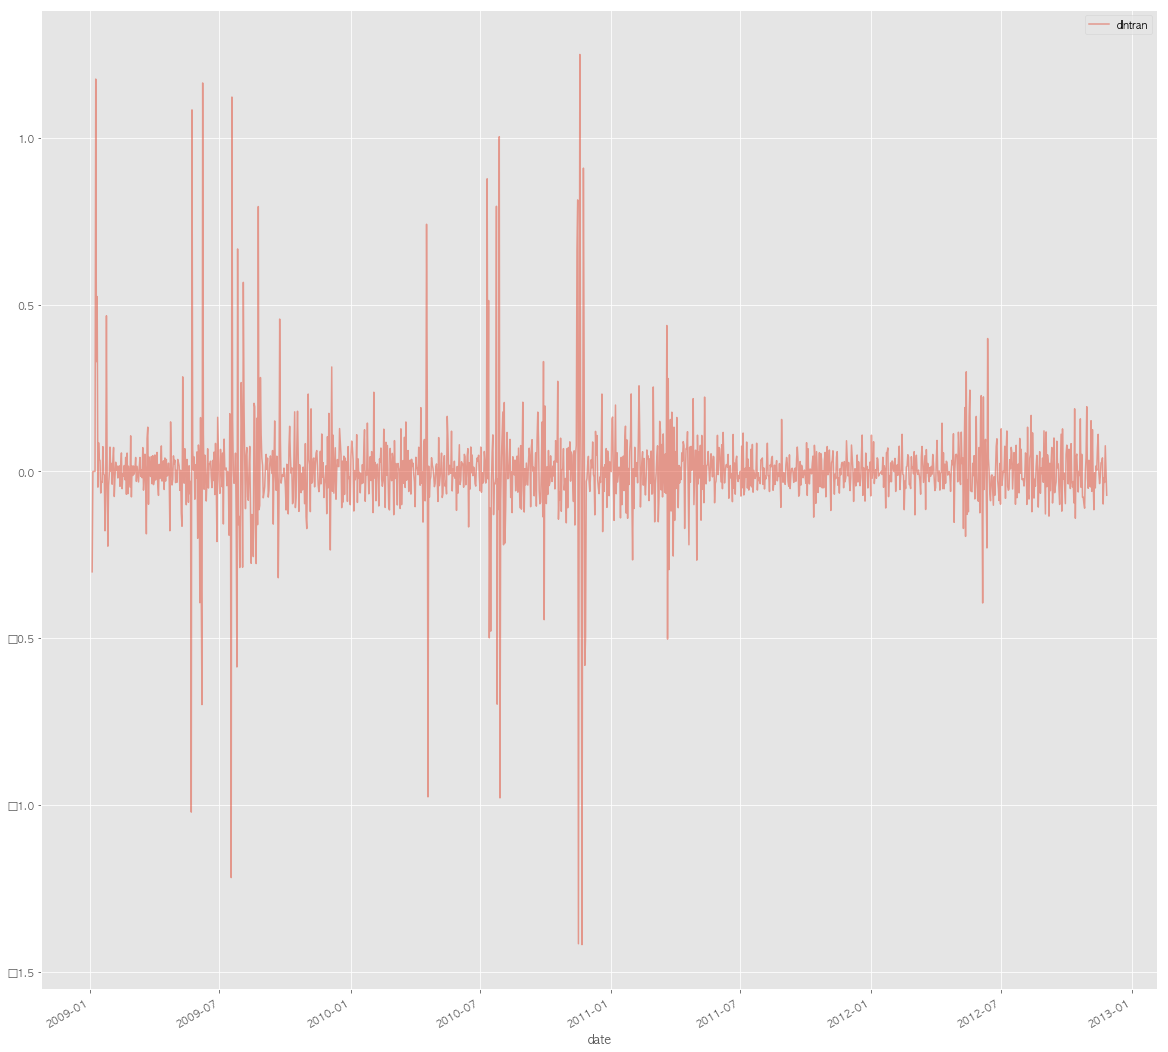

In [265]:
data_dl.plot(y='dlntran', figsize=(20,20), alpha=0.5)

In [266]:
data_dl.describe()

,dlntran,dlntrat,dlntrep,dletrav,dltoutv,dltotbc,dlmkpru,dltrfee,dlmirev,dldiff,dlatrct,dlnaddu,dlavbls,dlbcdde,dlbcddc,dlhrate
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1.424000e+03,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1.424000e+03,1424.000000,1424.000000,1.423000e+03
mean,0.002928,0.004683,0.002714,0.003780,0.003090,0.003731,7.944505e-04,0.001340,0.003499,0.004379,0.000729,0.002947,2.565586e-05,0.004672,0.006611,1.005700e-03
std,0.156963,0.031513,0.155738,1.060430,0.287824,0.037340,1.662502e-02,0.159463,0.090341,0.030666,0.054271,0.132852,3.081948e-03,1.382053,0.064403,3.317567e-02
min,-1.418460,0.000000,-1.418460,-4.646903,-1.707570,0.000000,-9.718093e-02,-1.724303,-0.446278,-0.301030,-0.361832,-1.217484,-3.752353e-02,-6.046999,0.000000,-1.868111e-01
25%,-0.044312,0.001316,-0.042892,-0.145242,-0.120131,0.000393,-1.104771e-03,-0.017366,-0.011738,0.000000,0.000000,-0.041432,-9.788094e-05,-0.317623,0.000235,-9.086415e-04
50%,-0.000886,0.001778,0.000000,0.000000,-0.002216,0.000765,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000041,5.165353e-10,0.000000,0.000602,6.476642e-08
75%,0.044358,0.002759,0.044323,0.140981,0.108882,0.001465,6.682752e-07,0.012552,0.016231,0.000000,0.000000,0.040176,1.125001e-04,0.337008,0.001900,3.308074e-03
max,1.249803,0.903090,1.249803,4.646903,2.845718,1.168070,2.149956e-01,1.488418,2.703029,0.594981,1.081587,1.176091,2.447438e-02,6.046999,2.187521,2.576562e-01


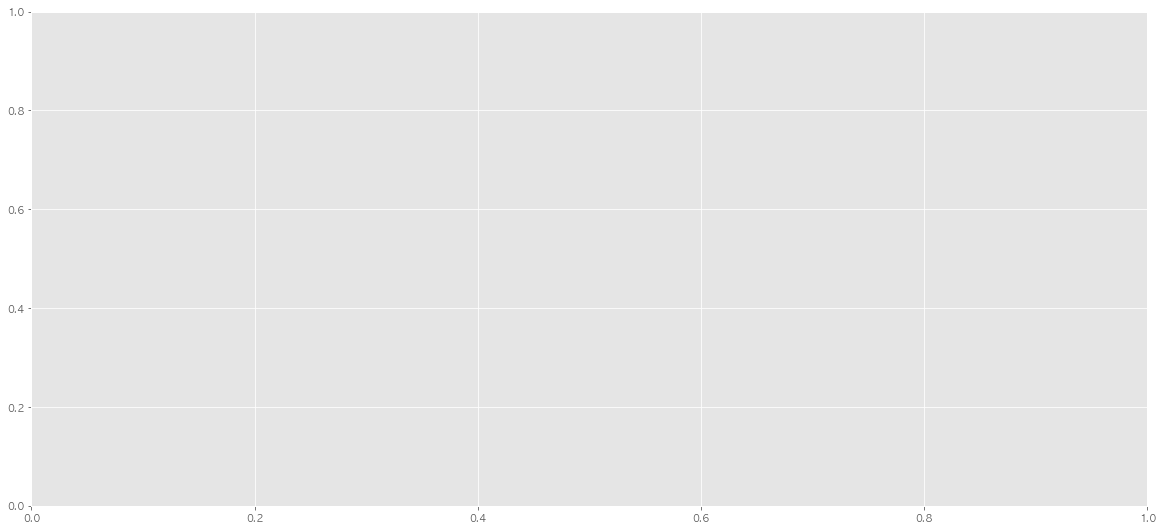

In [271]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)

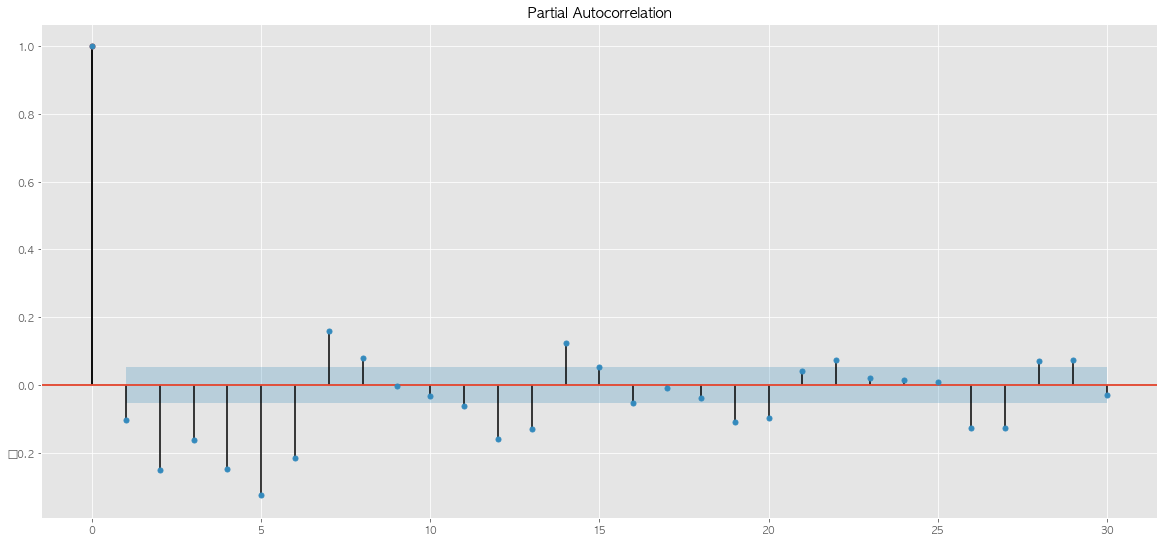

In [274]:
sm.graphics.tsa.plot_pacf(data_dl['dlntran'], lags=30, ax=ax1)

In [275]:
lb_test_dlntran = sm.stats.diagnostic.acorr_ljungbox(data_dl['dlntran'], lags=10)

In [276]:
lb_test_dlntran_q = pd.DataFrame(lb_test_dlntran[0], index=list(range(1,11)), columns=['Q(m)'], dtype='float').T
lb_test_dlntran_p = pd.DataFrame(lb_test_dlntran[1], index=list(range(1,11)), columns=['P値'], dtype='float').T

In [278]:
lb_test_dlntran_q

,1,2,3,4,5,6,7,8,9,10
Q(m),14.124779,89.167057,100.573362,121.85586,148.759489,154.922207,324.155439,327.415832,353.737278,366.951811


In [279]:
lb_test_dlntran_p

,1,2,3,4,5,6,7,8,9,10
P値,0.000171,4.341298e-20,1.170062e-21,2.143990e-25,2.452233e-30,7.037518e-31,4.168519e-66,5.951079e-66,9.924077e-71,1.002424e-72
